In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('output.csv')
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


<Axes: xlabel='Anaemic', ylabel='Hb'>

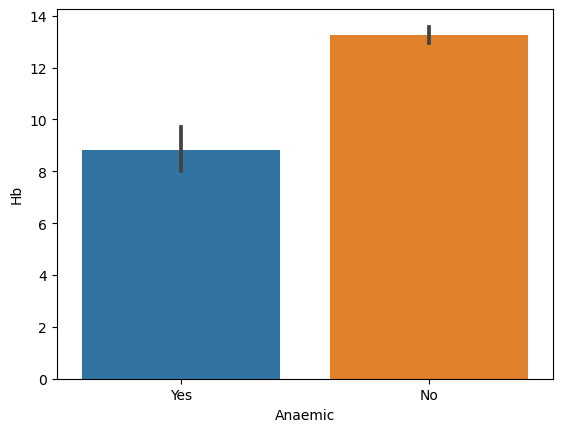

In [3]:
sns.barplot(x='Anaemic',y='Hb',data=df)

<Axes: xlabel='%Red Pixel', ylabel='Hb'>

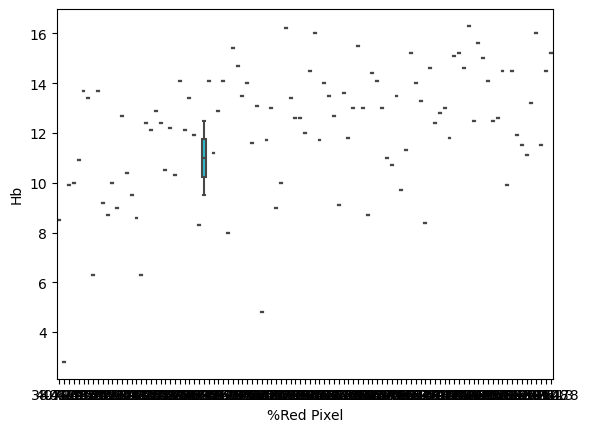

In [4]:
sns.boxplot(x="%Red Pixel", y="Hb", data=df,palette='rainbow')

<Axes: xlabel='%Blue pixel', ylabel='Sex'>

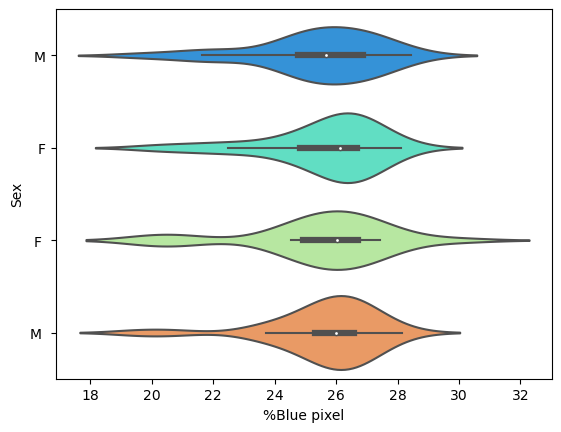

In [5]:
sns.violinplot(x="%Blue pixel", y="Sex", data=df,palette='rainbow')

<Axes: xlabel='%Green pixel', ylabel='Density'>

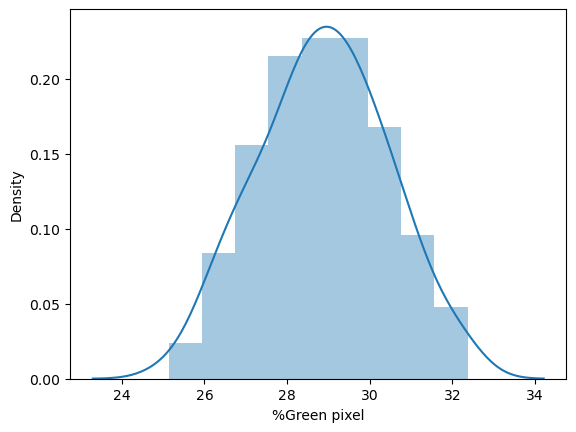

In [6]:
sns.distplot(df['%Green pixel'])

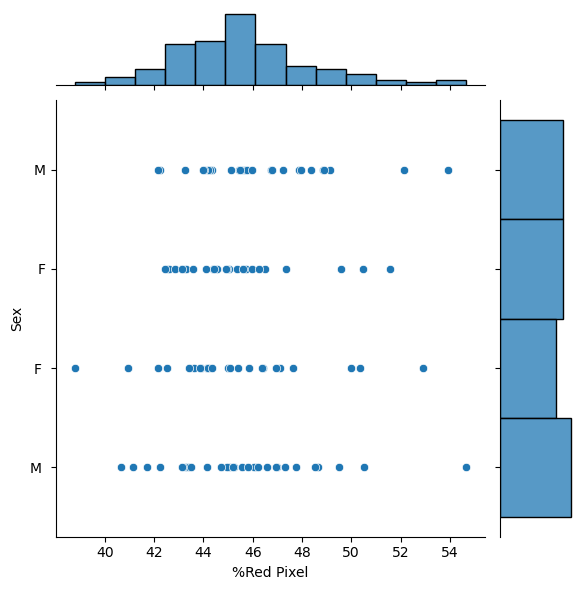

In [7]:
sns.jointplot(x="%Red Pixel", y="Sex",data=df,kind='scatter')

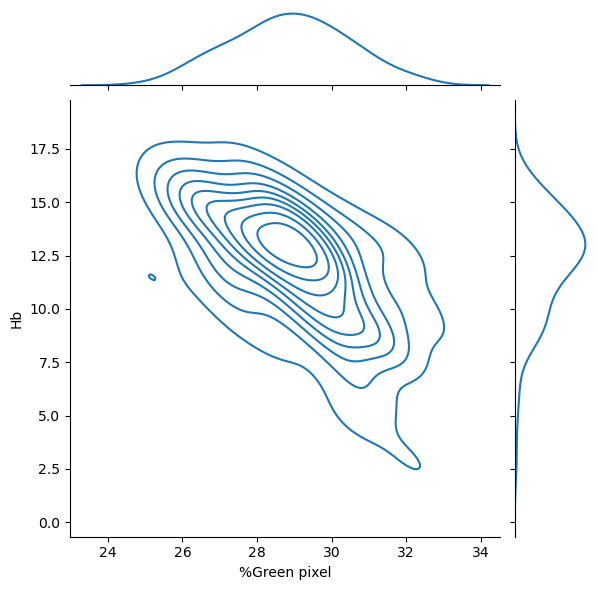

In [8]:
sns.jointplot(x='%Green pixel',y='Hb',data=df,kind='kde')

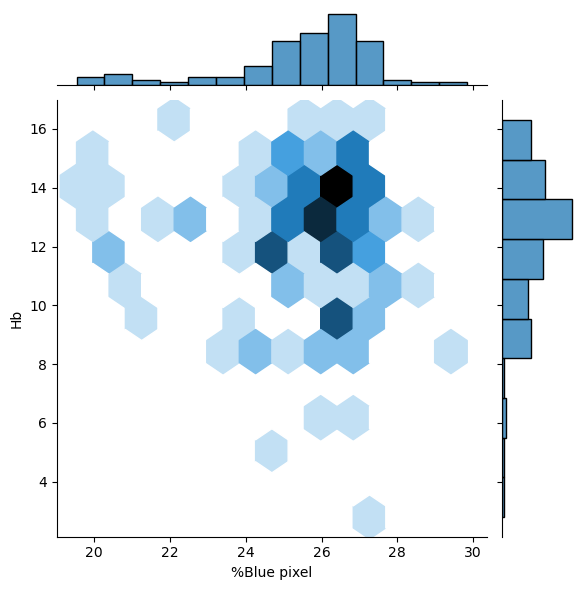

In [9]:
sns.jointplot(x='%Blue pixel',y='Hb',data=df,kind='hex')

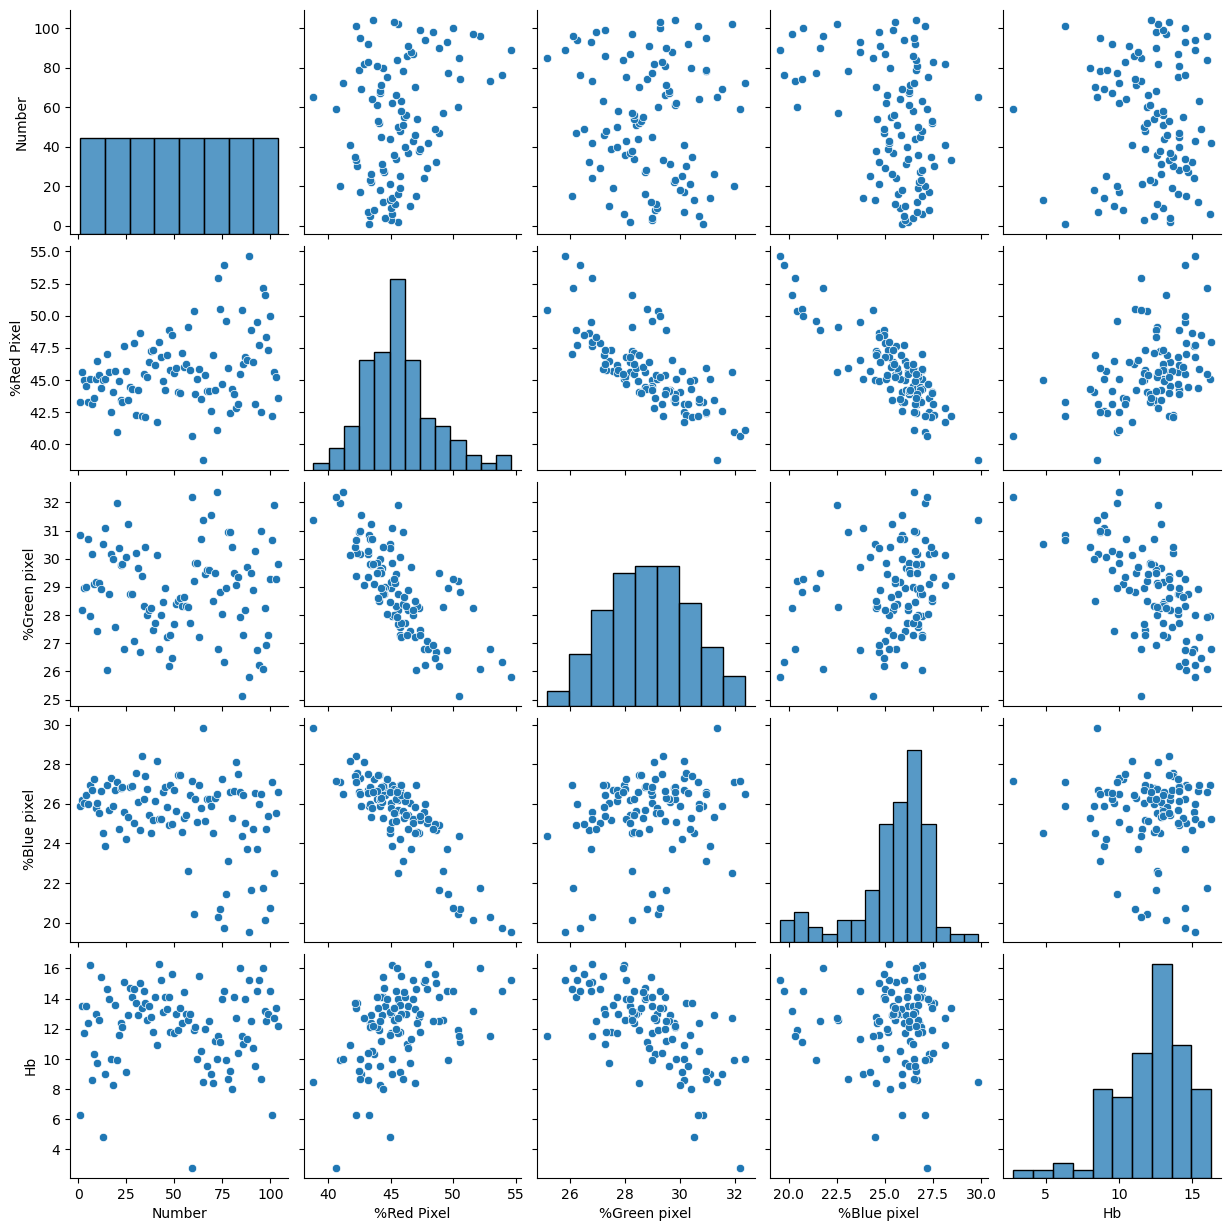

In [10]:
sns.pairplot(df)

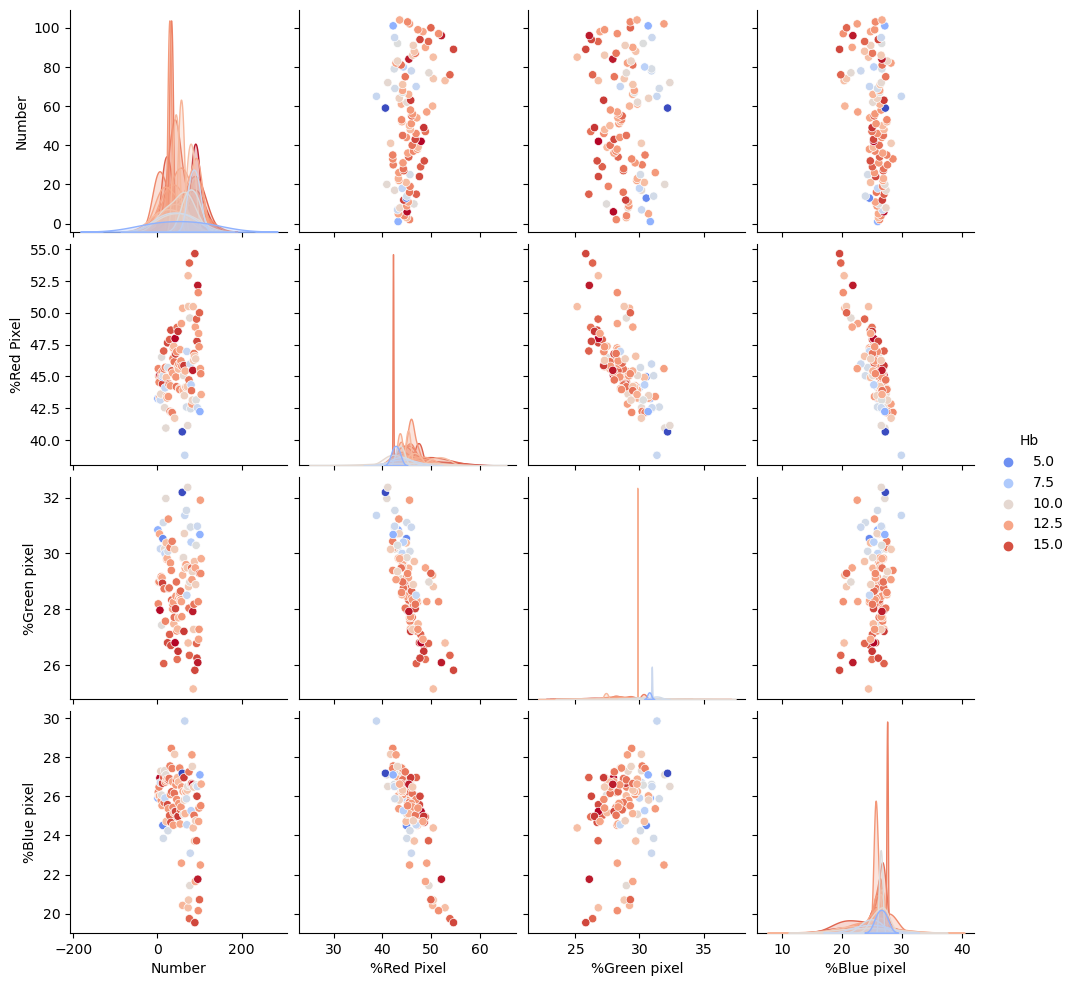

In [11]:
sns.pairplot(df,hue='Hb',palette='coolwarm')

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Anaemic']=label_encoder.fit_transform(df['Anaemic'])
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,1
1,2,F,45.6033,28.1900,26.2067,13.5,0
2,3,F,45.0107,28.9677,26.0215,11.7,0
3,4,F,44.5398,28.9899,26.4703,13.5,0
4,5,M,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,1
100,101,M,42.2324,30.6757,27.0919,6.3,1
101,102,F,45.6064,31.9084,22.4852,12.7,0
102,103,M,45.2095,29.2769,25.5136,13.4,0


In [13]:
df = df.iloc[:, 2:]
df.to_csv('modified_dataset.csv', index=False)

In [14]:
df

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,43.2555,30.8421,25.9025,6.3,1
1,45.6033,28.1900,26.2067,13.5,0
2,45.0107,28.9677,26.0215,11.7,0
3,44.5398,28.9899,26.4703,13.5,0
4,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5,1
100,42.2324,30.6757,27.0919,6.3,1
101,45.6064,31.9084,22.4852,12.7,0
102,45.2095,29.2769,25.5136,13.4,0


In [15]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,df.columns!='Anaemic'] 
y = df.iloc[:,df.columns=='Anaemic']

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [17]:
xtrain

,%Red Pixel,%Green pixel,%Blue pixel,Hb
1,45.6033,28.1900,26.2067,13.5
85,46.2550,27.2758,26.4692,11.0
36,46.4081,28.1641,25.4278,13.5
97,48.3681,26.9220,24.7099,12.5
98,47.3260,27.2780,25.3960,13.0
...,...,...,...,...
73,50.4976,28.8065,20.6960,11.1
57,45.7986,27.7309,26.4706,13.0
28,47.8913,27.0952,25.0135,14.6
56,49.1475,28.2711,22.5813,12.6


In [18]:
ytrain

,Anaemic
1,0
85,0
36,0
97,0
98,0
...,...
73,0
57,0
28,0
56,0


In [19]:
xtest

,%Red Pixel,%Green pixel,%Blue pixel,Hb
26,44.4252,28.7436,26.8312,14.7
58,40.6395,32.1891,27.1714,2.8
32,42.1652,29.3907,28.4441,13.4
5,45.0994,27.9645,26.9361,16.2
53,47.1003,28.3195,24.5801,12.4
75,53.9113,26.3455,19.7433,14.5
18,45.7104,27.5693,26.7204,13.6
80,43.8783,29.4752,26.6465,14.1
6,43.1457,30.1628,26.6915,8.6
90,46.3745,28.8820,24.7435,10.7


In [20]:
ytest

,Anaemic
26,0
58,1
32,0
5,0
53,0
75,0
18,0
80,0
6,1
90,0


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [22]:
print(df.head())

   %Red Pixel  %Green pixel  %Blue pixel    Hb  Anaemic
0     43.2555       30.8421      25.9025   6.3        1
1     45.6033       28.1900      26.2067  13.5        0
2     45.0107       28.9677      26.0215  11.7        0
3     44.5398       28.9899      26.4703  13.5        0
4     43.2870       30.6972      26.0158  12.4        0


In [24]:
X = df[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']]

In [25]:
y = df['Anaemic']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
log_reg = LogisticRegression()

In [28]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = log_reg.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [32]:
y_proba = log_reg.predict_proba(X_test)
print(y_proba)

[[9.74621537e-01 2.53784626e-02]
 [9.02120981e-01 9.78790195e-02]
 [3.12646465e-02 9.68735354e-01]
 [9.68844602e-01 3.11553975e-02]
 [9.96658796e-01 3.34120450e-03]
 [9.99900651e-01 9.93490396e-05]
 [1.38017531e-01 8.61982469e-01]
 [9.72618691e-01 2.73813085e-02]
 [9.68239819e-01 3.17601810e-02]
 [7.75067549e-04 9.99224932e-01]
 [9.97760317e-01 2.23968279e-03]
 [9.99775570e-01 2.24429600e-04]
 [9.99762623e-01 2.37376770e-04]
 [9.99943869e-01 5.61306961e-05]
 [1.69677694e-02 9.83032231e-01]
 [9.03850079e-01 9.61499212e-02]
 [9.96620319e-01 3.37968134e-03]
 [9.99013113e-01 9.86886608e-04]
 [7.47611540e-05 9.99925239e-01]
 [9.99158177e-01 8.41822998e-04]
 [9.94115387e-01 5.88461323e-03]]


In [33]:
new_patient_data = [[43.2555,30.8421,25.9025,6.3]]  # Format: [[%Red Pixel, %Green Pixel, %Blue Pixel, Hb]]->this is a yes

In [34]:
prediction = log_reg.predict(new_patient_data)
if prediction[0] == 1:
    print("The patient is anemic.")
else:
    print("The patient is not anemic.")

The patient is anemic.


In [35]:
new_patients_data = [
    [45.6033,28.1900,26.2067,13.5,],    # Patient 1
    [49.9999,29.2860,20.7141,14.5],     # Patient 2
    [25, 35, 40, 9]                     # Patient 3
]

In [36]:
predictions = log_reg.predict(new_patients_data)
for i, pred in enumerate(predictions):
    if pred == 1:
        print(f"Patient {i+1} is anemic.")
    else:
        print(f"Patient {i+1} is not anemic.")

Patient 1 is not anemic.
Patient 2 is not anemic.
Patient 3 is anemic.
